# Práctico 1

En este práctico, correspondiente a la primera mitad de la materia, trabajaremos con un dataset extraído de Twitter. La idea es emplear los conceptos de grafos vistos en clase sobre un caso real de actualidad.

## Dataset

El dataset consiste en un conjunto de hilos de tweets, con un total de ~150000 tweets, extraídos entre Enero y Marzo de 2021. La temática de los mismos está referida a la vacunación contra el covid-19 en Argentina.

Pueden descargar el dataset del siguiente [link](https://drive.google.com/file/d/1X_qKsE8muAnom2tDX4sLlmBAO0Ikfe_G/view?usp=sharing).

### Campos

- **created_at:** Fecha del tweet
- **id_str:** ID del tweet
- **full_text:** Contenido del tweet
- **in_reply_to_status_id:** ID del tweet inmediatamente anterior en el hilo
- **in_reply_to_user_id:** Autor del tweet inmediatamente anterior en el hilo
- **user.id:** Autor del tweet
- **user_retweeters:** Lista de ID de usuarios que retweetearon el tweet
- **sentiment:** Etiquetado manual que indica el sentimiento o intención del tweet con respecto al tweet anterior en el hilo

## Configuración inicial

In [2]:
import pandas as pd
from pathlib import Path
import numpy as np

# ## Descargar el csv con los datos en este directorio
# DATA_DIR = Path('../data/twitter')
# INPUT_FILE = DATA_DIR / 'vacunas.csv'

# ## Creamos el directorio en caso de que no exista
# DATA_DIR.mkdir(parents=True, exist_ok=True)

### Cargamos el dataset

In [3]:
dtypes = {
    'id_str': str,
    'full_text': str,
    'in_reply_to_status_id': str,
    'in_reply_to_user_id': str,
    'user.id': str
}

path='../data/vacunas.csv'
df = pd.read_csv(path, dtype=dtypes).dropna(subset=['user_retweeters'])
df['user_retweeters'] = df['user_retweeters'].apply(lambda x: [str(elem) for elem in eval(x)])
print(df.shape)
df.head()

(155123, 8)


,created_at,id_str,full_text,in_reply_to_status_id,in_reply_to_user_id,user.id,user_retweeters,sentiment
0,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,"[2258074658, 159909978, 105301854, 290671142, ...",NaN
1,Sat Feb 20 03:19:59 +0000 2021,1362965193509265417,@Clon_43 @norabar Nora estaba indignada porque...,1362962469749153792,2737379453,32718111,[],NaN
2,Mon Feb 22 23:55:08 +0000 2021,1364000806740111363,"Bueno, Alberto dijo Salud o Economía. La salud...",NaN,NaN,252168075,"[1238117630696972289, 37232479, 12792246571247...",NaN
3,Tue Feb 23 00:09:14 +0000 2021,1364004354374696963,@spitta1969 Tuit del mes Spitta,1364000806740111363,252168075,1156346340802224128,[],NaN
4,Tue Feb 23 00:00:17 +0000 2021,1364002100364128260,@spitta1969 Estas onfire,1364000806740111363,252168075,153663816,[],NaN


### Observamos algunos ejemplos

In [4]:
idx = 0
print('Texto:', df.full_text.values[idx])
print('Retweets:', len(df.user_retweeters.values[idx]))

Texto: Seguimos esperando el comunicado de @norabar repudiando la situación respecto del gobierno y el tema vacunas. Seamos pacientes que con esto de la pandemia anda con mucho "laburo".
Retweets: 9


In [5]:
idx = 376
print('Text:', df.full_text.values[idx])
print('Retweets:', len(df.user_retweeters.values[idx]))

Text: Todo lo que hay que entender sobre la decisión –o no– de poner más vacunas en más brazos (por ejemplo, usar las 1º dosis en muchos y si es necesario retrasar la 2º) está en esta excelente nota de Nora Bär. https://t.co/A0I03DyxgO
Retweets: 48


### Calculamos la cantidad de hilos

In [6]:
roots = df[df['in_reply_to_user_id'].isna()]
roots.shape

(3174, 8)

## Actividades

### **1. Construcción del grafo** 

Construir el **grafo de retweets**, definido de la siguiente manera:

- Tipo de grafo: Dirigido
- Nodos: ID de los usuarios
- Enlaces: (Usuario A) ---> (Usuario B) si B retweeteó algún tweet de A

Con estos datos, el grafo debería tener alrededor de 40000 nodos y 90000 enlaces.

Considerar la versión no dirigida del grafo y estudiar su conectividad. Si existe una única "componente gigante", realizar el resto de las actividades sobre ella, en lugar de sobre el grafo completo.

Calcular las siguientes métricas globales del grafo:

- Grado medio
- Asortatividad
- Transitividad
- Coeficiente de clustering de Watts-Strogatz

**Opcional:** Comparar las métricas calculadas anteriormente con las de un grafo aleatorio con la misma distribución de grado. Pueden utilizar para ello este [método](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html?highlight=configuration#networkx.generators.degree_seq.configuration_model). Con esto en mente, comentar si los valores obtenidos anteriormente difieren significativamente del caso aleatorio.


### **2. Centralidad**

Calcular 5 métricas de centralidad de nodos. Graficar la distribución de cada una de ellas ¿Existe alguna correlación entre las distintas centralidades? 

Hacer un ranking con los 10 nodos más centrales para cada métrica. ¿Hay coincidencia entre los rankings?. ¿Qué características tienen los usuarios más centrales y sus respectivos tweets?

**Opcional:** Determinar si existe alguna correlación entre la centralidad de un nodo y su actividad en red social. Es decir, evaluar si los usuarios que más escriben son los más centrales o no.

### **3. Comunidades**

Utilizar el algoritmo de Louvain con el parámetro "resolución" igual a 1. Caracterizar las comunidades halladas (cantidad, distribución de tamaños). Utilizar la modularidad y otras dos métricas a elección para evaluar la calidad de la partición encontrada. 

Variar el parámetro "resolución" y observar cómo cambia la distribución de comunidades encontradas. ¿Existe algún valor para el cual se identifiquen dos grandes comunidades?

Elegir otro algoritmo de detección de comunidades y comparar los resultados con los obtenidos anteriormente.

**Opcional:** Correr el algoritmo de Louvain con distintas semillas aleatorias. Utilizar alguna métrica de comparación externa entre las particiones obtenidas para determinar en qué medida depende el algoritmo de la condición inicial.

# Actividad 1: Construcción del grafo

In [7]:
df_enlaces=df[['user_retweeters','user.id']].explode('user_retweeters').reset_index(drop=True)
df_enlaces.drop_duplicates(inplace=True)   # Se eliminan enlaces duplicados
df_enlaces.dropna(inplace=True)

In [8]:
import networkx as nx

g_di = nx.from_pandas_edgelist(df_enlaces, source='user_retweeters', target='user.id',create_using=nx.DiGraph) 
print(nx.info(g_di))

Name: 
Type: DiGraph
Number of nodes: 39800
Number of edges: 93692
Average in degree:   2.3541
Average out degree:   2.3541


In [9]:
# Verificamos si la cantidad de usuarios coincide con el número de nodos. En la columna user_id no aparecen todos los nodos, por ejemplo un usuario que retweeteo 
# pero que no participó de los hilos.

len(set(df_enlaces['user.id'].tolist() + df_enlaces['user_retweeters'].tolist()))

39800

## Versión no dirigida

In [10]:
g = nx.from_pandas_edgelist(df_enlaces, source='user_retweeters', target='user.id',create_using=nx.Graph) 
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 39800
Number of edges: 93404
Average degree:   4.6937


### Matriz de adyacencia

In [11]:
A = nx.adjacency_matrix(g)
A=A.toarray()
print(A)

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Matriz Laplaciana

La conectividad se puede estudiar en términos de los autovalores de la matriz laplaciana (diferencia entre la matriz de grado y la de adyacencia L=D-A).

El segundo autovalor no nulo se denomina conectividad algebraica y es una medida de la conectividad del grafo (mas pequeño, mas modular)

In [12]:
L = nx.laplacian_matrix(g).toarray()
print(L)

[[19 -1  0 ...  0  0  0]
 [-1  9 -1 ...  0  0  0]
 [ 0 -1  1 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]


Podemos tambien usar la funcion algebraic_connectivity de Network x (es el segundo autovalor no nulo de la matriz Laplaciana)

In [13]:
nx.algebraic_connectivity(g)

0.0

Vemos que no es un grafo conexo. Se analizan para ello cada una de las componentes y la distribución.

In [14]:
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)

In [15]:
for numero,component in enumerate(Gcc):
    print("Componente {} - tamaño: {}".format(numero,len(component)))

Componente 0 - tamaño: 38998
Componente 1 - tamaño: 106
Componente 2 - tamaño: 32
Componente 3 - tamaño: 22
Componente 4 - tamaño: 13
Componente 5 - tamaño: 8
Componente 6 - tamaño: 7
Componente 7 - tamaño: 7
Componente 8 - tamaño: 6
Componente 9 - tamaño: 5
Componente 10 - tamaño: 4
Componente 11 - tamaño: 4
Componente 12 - tamaño: 4
Componente 13 - tamaño: 4
Componente 14 - tamaño: 4
Componente 15 - tamaño: 4
Componente 16 - tamaño: 4
Componente 17 - tamaño: 3
Componente 18 - tamaño: 3
Componente 19 - tamaño: 3
Componente 20 - tamaño: 3
Componente 21 - tamaño: 3
Componente 22 - tamaño: 3
Componente 23 - tamaño: 3
Componente 24 - tamaño: 3
Componente 25 - tamaño: 3
Componente 26 - tamaño: 3
Componente 27 - tamaño: 3
Componente 28 - tamaño: 3
Componente 29 - tamaño: 3
Componente 30 - tamaño: 3
Componente 31 - tamaño: 3
Componente 32 - tamaño: 3
Componente 33 - tamaño: 3
Componente 34 - tamaño: 3
Componente 35 - tamaño: 3
Componente 36 - tamaño: 3
Componente 37 - tamaño: 3
Componente 38

Como puede observarse en el grafo a continuación, existen 57 componentes aisladas, 212 de tamaño 2 (un solo retweet). Nos vamos a quedar con la componente gigante (38998 nodos)

In [16]:
from collections import Counter

x = [len(c) for c in Gcc]
Counter(x)

Counter({38998: 1,
         106: 1,
         32: 1,
         22: 1,
         13: 1,
         8: 1,
         7: 2,
         6: 1,
         5: 1,
         4: 7,
         3: 29,
         2: 212,
         1: 57})

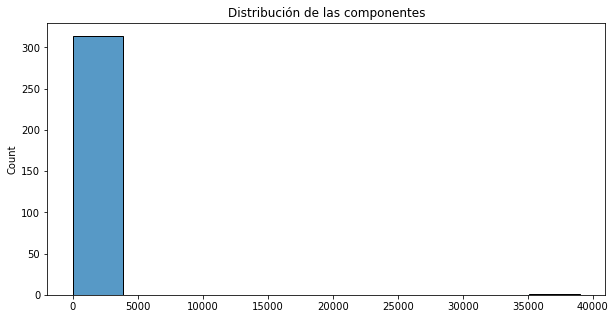

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

x = [len(c) for c in Gcc]
plt.figure(figsize=(10,5))
sns.histplot(x)
plt.title("Distribución de las componentes")
plt.show()

In [18]:
#Nos quedamos con la componente gigante

G = g.subgraph(Gcc[0])

nx.algebraic_connectivity(G)

0.014577205403052755

In [19]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 38998
Number of edges: 92830
Average degree:   4.7608


In [20]:
df_metricas=pd.DataFrame(G.degree()).rename(columns={0:'nodo',1:'degree'})

clustering_coefficient = nx.clustering(G)
df_metricas['transitividad'] = list(clustering_coefficient.values())
df_metricas['asortatividad']=(nx.degree_assortativity_coefficient(G))
df_metricas['watts_stogratz']=(nx.average_clustering(G))

In [21]:
df_metricas

,nodo,degree,transitividad,asortatividad,watts_stogratz
0,2258074658,19,0.052632,-0.222899,0.101898
1,2737379453,9,0.000000,-0.222899,0.101898
2,159909978,1,0.000000,-0.222899,0.101898
3,105301854,10,0.066667,-0.222899,0.101898
4,290671142,15,0.066667,-0.222899,0.101898
...,...,...,...,...,...
38993,2650545267,1,0.000000,-0.222899,0.101898
38994,339254354,6,0.000000,-0.222899,0.101898
38995,346605471,1,0.000000,-0.222899,0.101898
38996,58065646,1,0.000000,-0.222899,0.101898


# Actividad 2: Centralidad

In [33]:
import igraph as ig

G_ig = ig.Graph.TupleList(G.edges())

betweenness=G_ig.betweenness() #que tan importante es el nodo como punto de comunicación con el resto
eigenvector = G_ig.eigenvector_centrality()  #tiene en cuenta la centralidad de los vecinos
closeness=G_ig.closeness() #que tan central es el nodo. Numero de nodos sobre la distancia a todos los nodos.
pagerank=G_ig.pagerank()

In [34]:
katz = nx.katz_centrality(G)

df_centralidad=pd.DataFrame()

df_centralidad['katz'] = list(katz.values())


In [ ]:
G_ig.